In [1]:
import pandas as pd
import matplotlib.pyplot as plt

AOT = pd.read_csv('Airings_on_TV.csv')
UAA = pd.read_csv('Unique_Ads_Archived.csv')

In [2]:
AOT = AOT[AOT['race'] == 'PRES']
AOT['race'].unique()

array(['PRES'], dtype=object)

In [3]:
AOT = AOT.drop(['id', 'wp_identifier', 'network', 'archive_id', 'embed_url', 'subjects', 'type', 'date_created'], axis=1)
AOT = AOT.drop(['location', 'program', 'program_type'], axis=1)

AOT = AOT[~AOT['sponsors'].isna()]

AOT = AOT[~AOT['cycle'].isna()]
AOT['cycle'] = AOT['cycle'].astype(int)

AOT['message'].replace('mixed','mix', inplace=True)
AOT = AOT[AOT['message'] != 'unknown']

AOT['start_time'] = pd.to_datetime(AOT['start_time'])
AOT['end_time'] = pd.to_datetime(AOT['end_time'])
AOT['air_secs'] = (AOT['end_time'] - AOT['start_time']).dt.total_seconds()

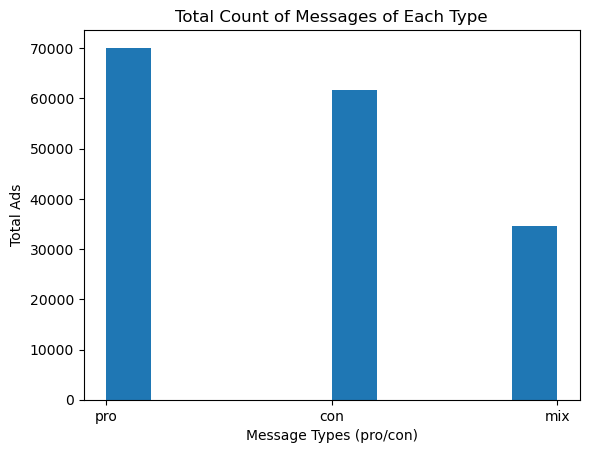

In [4]:
plt.hist(AOT['message'])
plt.xlabel('Message Types (pro/con)')
plt.ylabel('Total Ads')
plt.title("Total Count of Messages of Each Type")
plt.show()

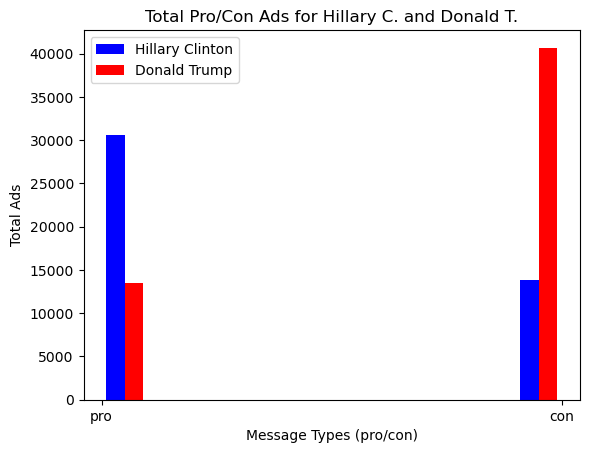

In [5]:
HC = AOT[AOT['candidates'].str.contains('Hillary Clinton', case=False)]
HC = HC[~HC['candidates'].str.contains('Donald Trump', case=False)]
HC = HC[HC['message'] != 'mix']

DT = AOT[AOT['candidates'].str.contains('Donald Trump', case=False)]
DT = DT[~DT['candidates'].str.contains('Hillary Clinton', case=False)]
DT = DT[DT['message'] != 'mix']

plt.hist([HC['message'],DT['message']], color = ['blue','red'],\
         label=['Hillary Clinton','Donald Trump'])
plt.xlabel('Message Types (pro/con)')
plt.ylabel('Total Ads')
plt.title('Total Pro/Con Ads for Hillary C. and Donald T.')
plt.legend()
plt.show()

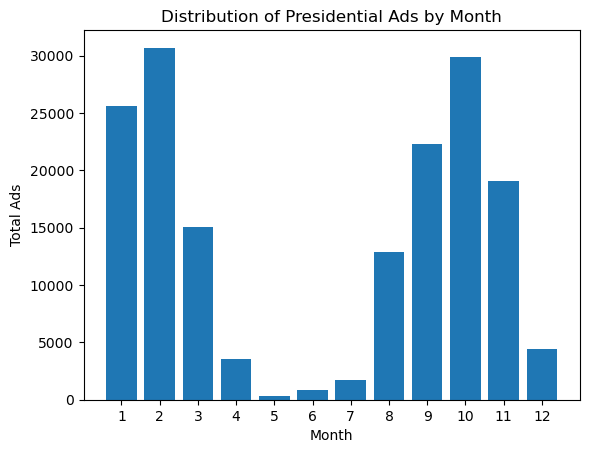

In [6]:
AOT['month'] = AOT['start_time'].dt.month
group_mo = AOT.groupby('month')['month'].size()

plt.bar(group_mo.index, group_mo)
plt.xlabel('Month')
plt.ylabel('Total Ads')
plt.title('Distribution of Presidential Ads by Month')
plt.xticks(range(1, 13))
plt.show()

In [7]:
AOT

,start_time,end_time,sponsors,sponsor_types,race,cycle,candidates,message,air_secs,month
0,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,Hillary for America,Multiple,PRES,2016,Hillary Clinton,pro,30.0,9
1,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,Hillary for America,Multiple,PRES,2016,Hillary Clinton,pro,30.0,9
2,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,Hillary for America,Multiple,PRES,2016,Hillary Clinton,pro,30.0,9
3,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,Hillary for America,Multiple,PRES,2016,Hillary Clinton,pro,30.0,8
4,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,Hillary for America,Multiple,PRES,2016,Hillary Clinton,pro,30.0,9
...,...,...,...,...,...,...,...,...,...,...
375345,2016-01-09 02:09:27+00:00,2016-01-09 02:09:57+00:00,Rand Paul for President,Candidate Committee,PRES,2016,Rand Paul,pro,30.0,1
375346,2016-01-10 01:55:06+00:00,2016-01-10 01:55:36+00:00,Rand Paul for President,Candidate Committee,PRES,2016,Rand Paul,pro,30.0,1
375347,2016-01-10 01:23:51+00:00,2016-01-10 01:24:21+00:00,Rand Paul for President,Candidate Committee,PRES,2016,Rand Paul,pro,30.0,1
375348,2016-01-16 03:35:23+00:00,2016-01-16 03:35:53+00:00,Rand Paul for President,Candidate Committee,PRES,2016,Rand Paul,pro,30.0,1
